<a href="https://colab.research.google.com/github/AMMLRepos/heart-failure-detection/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install opendatasets --quiet

#Download dataset from Kaggle
To download dataset from kaggle, we will use [opendatasets library](https://github.com/JovianML/opendatasets) developed by jovian

In [54]:
import opendatasets as od
import os 

dataset_url = 'https://www.kaggle.com/andrewmvd/heart-failure-clinical-data'
od.download(dataset_url)

data_dir = os.listdir()[1]
filename = os.listdir("./heart-failure-clinical-data")[0]
file_path = "./" + data_dir + "/" + filename

Skipping, found downloaded files in "./heart-failure-clinical-data" (use force=True to force download)


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set_theme(style="darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [56]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [57]:
raw_heart_df = pd.read_csv(file_path)

In [58]:
print(raw_heart_df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
0    75.0        0                       582         0                 20                    1  265000.00               1.9           130    1        0     4            1
1    55.0        0                      7861         0                 38                    0  263358.03               1.1           136    1        0     6            1
2    65.0        0                       146         0                 20                    0  162000.00               1.3           129    1        1     7            1
3    50.0        1                       111         0                 20                    0  210000.00               1.9           137    1        0     7            1
4    65.0        1                       160         1                 20                    0  327000.00               2.7           116    0   

In [59]:
print(raw_heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [60]:
print(raw_heart_df.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  ejection_fraction  high_blood_pressure      platelets  serum_creatinine  serum_sodium         sex    smoking        time  DEATH_EVENT
count  299.000000  299.000000                299.000000  299.000000         299.000000           299.000000     299.000000         299.00000    299.000000  299.000000  299.00000  299.000000    299.00000
mean    60.833893    0.431438                581.839465    0.418060          38.083612             0.351171  263358.029264           1.39388    136.625418    0.648829    0.32107  130.260870      0.32107
std     11.894809    0.496107                970.287881    0.494067          11.834841             0.478136   97804.236869           1.03451      4.412477    0.478136    0.46767   77.614208      0.46767
min     40.000000    0.000000                 23.000000    0.000000          14.000000             0.000000   25100.000000           0.50000    113.000000    0.000000    0.00000    4.00000

# Visualization to understand basic relationships 

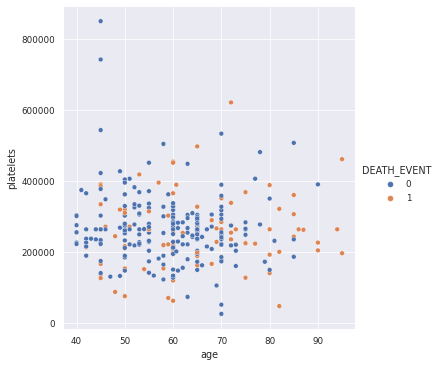

In [79]:
sns.relplot(x = "age", y = "platelets", hue = "DEATH_EVENT", data = raw_heart_df);

In [62]:
raw_heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


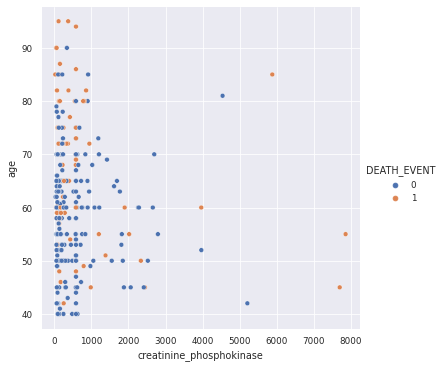

In [69]:
sns.relplot(x = "creatinine_phosphokinase", y = "age", hue = "DEATH_EVENT", data = raw_heart_df)

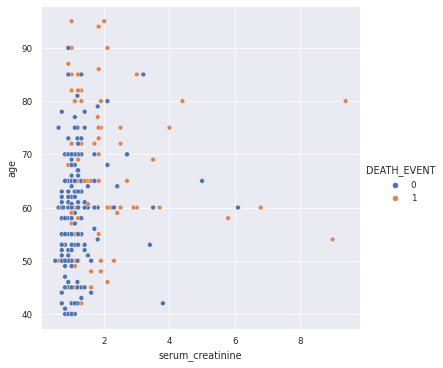

In [68]:
sns.relplot(x = "serum_creatinine", y = "age", hue = "DEATH_EVENT", data = raw_heart_df)

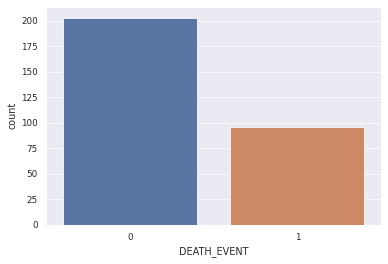

In [78]:
sns.countplot(x = "DEATH_EVENT", data = raw_heart_df)

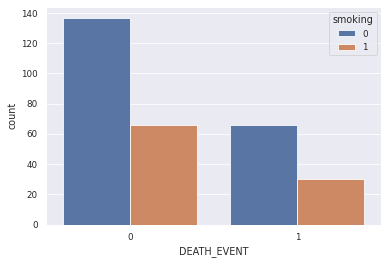

In [72]:
sns.countplot(x = "DEATH_EVENT", hue="smoking", data = raw_heart_df)

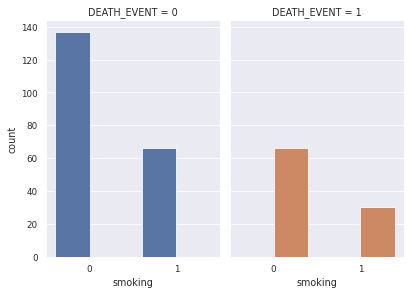

In [77]:
sns.catplot(x = "smoking", hue="DEATH_EVENT", col = "DEATH_EVENT",data = raw_heart_df, kind="count", height=4, aspect=.7);

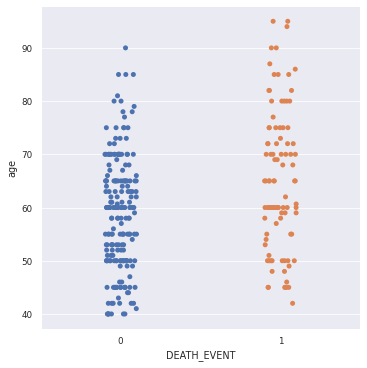

In [81]:
sns.catplot(x = "DEATH_EVENT", y = "age", data = raw_heart_df)

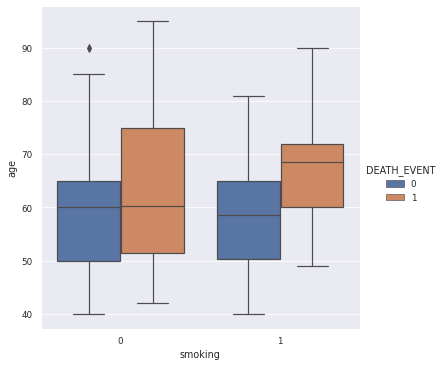

In [85]:
sns.catplot(x = "smoking", y = "age", hue = "DEATH_EVENT", kind = "box", data = raw_heart_df)